In [283]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [284]:
company = "googl"
date1 = "2010-01-01"
date2 = "2023-08-20"

Data Exploration

In [285]:
df = yf.download(tickers = company, start=date1, end=date2)
df = df.reset_index()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [286]:
df.shape

(3430, 7)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3430 non-null   datetime64[ns]
 1   Open       3430 non-null   float64       
 2   High       3430 non-null   float64       
 3   Low        3430 non-null   float64       
 4   Close      3430 non-null   float64       
 5   Adj Close  3430 non-null   float64       
 6   Volume     3430 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 187.7 KB


In [288]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [289]:
df.iloc[:, 1:] = MinMaxScaler().fit_transform(df.iloc[:, 1:])

Data Visualization

In [290]:
df['year'] = df['Date'].dt.strftime('%Y-%m-%d')
df['year'] = df['year'].apply(lambda x : x.split("-")[0])
df['year'] = pd.to_numeric(df['year'])

In [291]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2010-01-04,0.033652,0.033353,0.034553,0.034348,0.034348,0.118092,2010
1,2010-01-05,0.033693,0.033056,0.034064,0.033850,0.033850,0.189947,2010
2,2010-01-06,0.033457,0.032703,0.031312,0.031017,0.031017,0.256697,2010
3,2010-01-07,0.030521,0.029878,0.028827,0.028466,0.028466,0.423613,2010
4,2010-01-08,0.027417,0.028675,0.028185,0.029893,0.029893,0.307795,2010


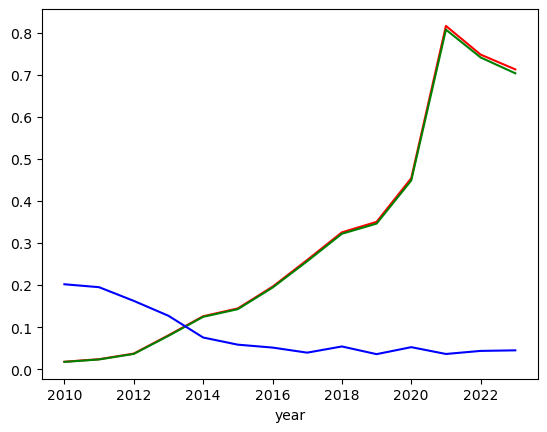

In [292]:
df.groupby("year")['Close'].mean().plot(color="red");
df.groupby("year")['Open'].mean().plot(color="green");
df.groupby("year")['Volume'].mean().plot(color="blue");

In [293]:
df["Daily Return"] = df["Close"].pct_change(1)

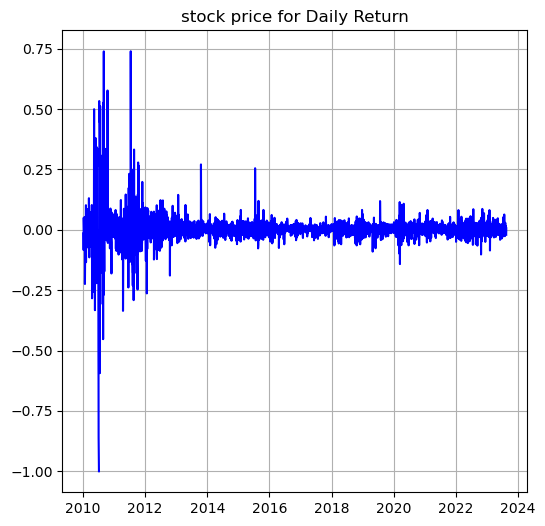

In [294]:
plt.figure(figsize=(6,6))
plt.title("stock price for Daily Return")
plt.plot(df['Date'], df['Daily Return'], color="blue")
plt.grid()
plt.show()

Volume

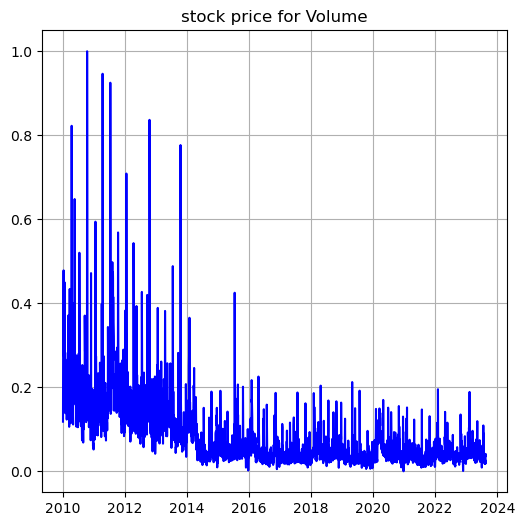

In [295]:
plt.figure(figsize=(6,6))
plt.title("stock price for Volume")
plt.plot(df['Date'], df['Volume'], color="blue")
plt.grid()
plt.show()

In [296]:
df.drop("Date", axis=1, inplace=True)

In [297]:
X = df.drop(["Close"], axis=1)
y = df['Close']


In [298]:
df = df.dropna(axis=1)

In [299]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
dtype: int64

In [300]:
y

0       0.034348
1       0.033850
2       0.031017
3       0.028466
4       0.029893
          ...   
3425    0.866774
3426    0.855617
3427    0.847843
3428    0.856625
3429    0.838918
Name: Close, Length: 3430, dtype: float64

In [301]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year
0,0.033652,0.033353,0.034553,0.034348,0.034348,0.118092,2010
1,0.033693,0.033056,0.034064,0.033850,0.033850,0.189947,2010
2,0.033457,0.032703,0.031312,0.031017,0.031017,0.256697,2010
3,0.030521,0.029878,0.028827,0.028466,0.028466,0.423613,2010
4,0.027417,0.028675,0.028185,0.029893,0.029893,0.307795,2010


In [302]:
df.dropna(axis=0, inplace=True)

In [303]:
df['year'] = pd.to_numeric(df['year'])

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3430 non-null   float64
 1   High       3430 non-null   float64
 2   Low        3430 non-null   float64
 3   Close      3430 non-null   float64
 4   Adj Close  3430 non-null   float64
 5   Volume     3430 non-null   float64
 6   year       3430 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 187.7 KB


In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [306]:
y_test

2122    0.329117
2911    0.901066
998     0.117113
2121    0.329732
341     0.017902
          ...   
3235    0.561359
1556    0.184961
3266    0.553154
1506    0.202981
273     0.031691
Name: Close, Length: 686, dtype: float64